03 t-SNEを用いた多様体学習
=======================

* データを変換して散布図で可視化したいときには、まず`PCA`を試してみるのは悪くはない

    * しかし、この手法(回転していくつかの方向を落とす)の性質上、その有用性は限られる
    
    * これは`Labeled Faces in the Wild`データセットの散布図で見たとおりである
    
* これに対して、可視化によく用いられる**多様体学習アルゴリズム**と呼ばれる一連のアルゴリズムがある

    * これらのアルゴリズムは、はるかに複雑なマッピングを行い、より良い可視化を実現できる
    
    * 特に有用なのが、`t-SNE`アルゴリズムである

* **多様体学習アルゴリズム**は主に可視化に用いられ、ほとんどの場合、3以上の新しい特徴量を生成するように利用することはない

    * さらに多様体学習アルゴリズムの一部(`t-SNE`を含む)は、訓練データの新たな表現を計算するが、新しいデータを変換することはできない
    
    * つまり、テストセットにこれらのアルゴリズムを適用することはできない
    
    * 訓練に使ったデータを変換することしかできない
    
* 多様体学習は、探索的なデータ解析に有用だが、最終的な目的が教師あり学習の場合にはほとんど用いられない

    * `t-SNE`は、データポイントの距離を可能な限り維持する2次元表現を見つけようとする
    
    * まず最初にランダムな2次元表現を作り、そこから、もとの特徴空間で近いデータポイントを近くに、遠いデータポイントを遠くに配置しようとする
    
    * つまり、どの点が近傍か示す情報を維持しようとする

* `t-SNE多様体学習`をscikit-learnに入っている手書き数字データセット(`digits`データセット)に適用してみる

    * このデータセットの個々のデータポイントは8×8のグレースケールの0から9までの手書き数字である

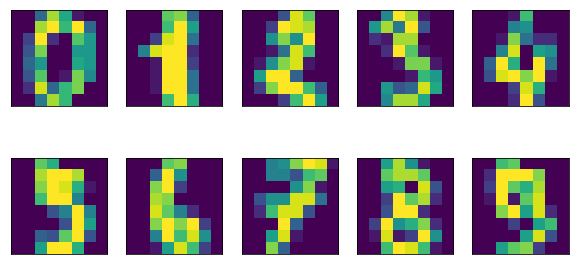

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

* `PCA`を使ってこのデータを2次元にして可視化してみる

    * 最初の2つの主成分を用い、各点をクラスごとに色分けしている

Text(0, 0.5, 'Second principal component')

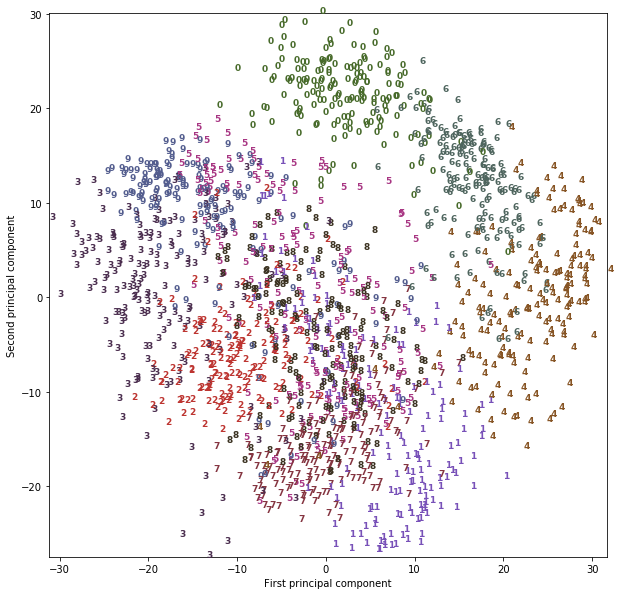

In [7]:
# PCAモデルを構築
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)

# 数値データを最初の2主成分で変形
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 散布図を数字でプロット
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

* ここでは、どのクラスがどこにあるかを示すために各点をその数字で表現している

    * 数字0と6と4は最初の2主成分で比較的うまく分離できているが、それでも重なっている
    
    * 他の数字は大きく重なり合っている

* 結果を比較するために、同じデータセットに対して`t-SNE`を適用してみる

    * `t-SNE`は新しいデータの変換をサポートしていないので、`TSNE`クラスには`transform`メソッドがない
    
    * これに変わって、`fit_transform`メソッドを利用する
    
    * このメソッドはモデルを作ると同時に、それを使って変換してデータを返す

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

# fitではなくfit_transformを用いる。TSNEにはtransformメソッドがない
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

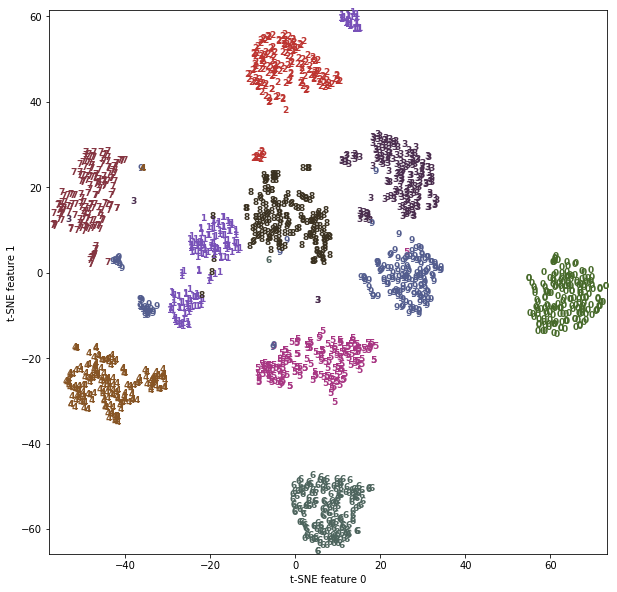

In [10]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

* `t-SNE`の結果は驚くべき物である。

    * 全てのクラスがかなり明確に分離されている
    
    * 1と9は少し分かれているが、ほとんどのクラスは1つの密な集団にまとまっている
    
    * このこの方法では、クラスラベルの知識を全く使っていない(完全に教師なし学習)
    
    * しかし、データをクラスごとにきれいに分割して2次元に表現する方法を、元の空間の点の近さだけを使って発見した

* `t-SNE`アルゴリズムにはチューニングパラメータがいくつかあるが、デフォルトの設定では大抵はうまく機能する

| 版 | 年/月/日 |
|----|----------|
|初版|2019/03/17|